In [225]:
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import pandas as pd
import collections

from allensdk.brain_observatory.behavior.behavior_ophys_api.behavior_ophys_nwb_api import BehaviorOphysNwbApi
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession

%matplotlib notebook

# Visual Behavior (Ophys) Session

The `BehaviorOphysSession` class in `allensdk.brain_observatory.behavior.behavior_ophys_session` provides an interface to all of the data for a single experimental session from the Visual Behavior pipeline, aligned to a common clock. This notebook will show you how to use the `BehaviorOphysSession` class to access data from a session.

In [38]:
basedir = '/allen/aibs/technology/nicholasc/behavior_ophys'

### Obtaining a `BehaviorOphysSession`

We package each session's data into a Neurodata Without Borders 2.0 (NWB) file. If you have local access to such a file, you can build an `BehaviorOphysSession` object for accessing the data within that file. The `BehaviorOphysSession` will load data from the NWB file on-demand and cache it in memory using the methods defined in the `BehaviorOphysNwbApi` class.  This is an example of a "dependency injection" pattern; the dependency necessary to go and fetch the data (here the `api` kwarg) is injected into the session object, which uses the methods on the api to populate the session attributes on-demand.

In [2]:
ophys_experiment_id = 775614751
full_filepath = os.path.join(basedir, 'behavior_ophys_session_{}.nwb'.format(ophys_experiment_id))
session = BehaviorOphysSession(api=BehaviorOphysNwbApi(full_filepath))

# Available lazy-loading attributes:

#### Metadata:
```python
session.ophys_experiment_id
session.metadata
session.task_parameters
```

#### Running Speed:
```python
session.running_speed
session.running_data_df
```

#### 2-D images:
```python
session.segmentation_mask_image
session.average_image
session.stimulus_templates
```

#### Timestamps:
```python
session.stimulus_timestamps
session.ophys_timestamps
```

#### Primary DataFrames:
```python
session.dff_traces
session.licks
session.rewards
session.cell_specimen_table
session.stimulus_presentations
session.trials
```

#### Running Speed:
```python
session.running_speed
```

#### Auxiliary DataFrames:
```python
session.corrected_fluorescence_traces
session.motion_correction
session.running_data_df
```

### Metadata:

In [34]:

print(session.ophys_experiment_id)
print()
for key, val in session.metadata.items():
    print('{}: {}'.format(key, val))
print()
for key, val in session.task_parameters.items():
    print('{}: {}'.format(key, val))

775614751

experiment_container_id: 782536745
behavior_session_uuid: 7da1aebf-fad4-4013-a991-18a13d1a8b94
reporter_line: ['Ai93(TITL-GCaMP6f)']
ophys_frame_rate: 31.0
rig_name: CAM2P.5
LabTracks_ID: 403491
targeted_structure: VISp
stimulus_frame_rate: 60.0
driver_line: ['Slc17a7-IRES2-Cre', 'Camk2a-tTA']
emission_lambda: 520.0
full_genotype: Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt
session_type: Unknown
excitation_lambda: 910.0
field_of_view_width: 447
field_of_view_height: 512
ophys_experiment_id: 775614751
indicator: GCAMP6f
imaging_depth: 375
experiment_datetime: 2018-11-08 18:38:05+00:00

response_window_sec: [0.15, 0.75]
stage: OPHYS_1_images_A
blank_duration_sec: [0.5, 0.5]
stimulus: images
stimulus_distribution: geometric
stimulus_duration_sec: 6.0
omitted_flash_fraction: nan
reward_volume: 0.007
n_stimulus_frames: 70931
task: DoC_untranslated


### Primary DataFrames:

In [50]:
print(session.dff_traces.head())
print(session.licks.head())
print(session.rewards.head())

                                                           dff
cell_roi_id                                                   
775897524    [-0.16283471450070594, -0.006066149705829521, ...
775897526    [-0.02764704696953053, 0.012065727679104766, -...
775897529    [0.054713890593743215, -0.057402297907511966, ...
775897533    [0.07960498154399953, -0.0824012051165664, -0....
775897539    [-0.008087602734049402, 0.026363486380196862, ...
      time
0  1.16744
1  1.38433
2  3.94210
3  8.53924
4  8.73144
            volume  autorewarded
timestamps                      
330.116294   0.007         False
439.703670   0.007         False
533.043776   0.007         False
651.738311   0.007         False
669.252095   0.007         False


In [53]:
for col in session.cell_specimen_table.columns:
    print(col)
session.cell_specimen_table.head()

cell_specimen_id
height
image_mask
mask_image_plane
max_correction_down
max_correction_left
max_correction_right
max_correction_up
valid_roi
width
x
y


,cell_specimen_id,height,image_mask,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y
cell_roi_id,,,,,,,,,,,,
775897524,817112817,12,"[[False, False, False, False, True, True, Fals...",1,-0.020091,15.9754,15.1489,0.607028,False,16,279,64
775897526,817112846,25,"[[False, False, False, False, False, False, Tr...",1,-0.020091,15.9754,15.1489,0.607028,True,18,386,68
775897529,817112802,21,"[[False, False, False, False, False, False, Fa...",1,-0.020091,15.9754,15.1489,0.607028,True,20,69,52
775897533,817112811,20,"[[False, False, False, False, False, False, Fa...",1,-0.020091,15.9754,15.1489,0.607028,True,14,409,59
775897539,817115968,15,"[[False, False, False, False, False, False, Fa...",1,-0.020091,15.9754,15.1489,0.607028,False,19,294,38


In [56]:
session.stimulus_presentations.head()

,duration,end_frame,image_category,image_name,orientation,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,
0,0.25014,18001,im065,im065,NaN,17986,309.13856,309.38870
1,0.25033,18046,im065,im065,NaN,18031,309.88913,310.13946
2,0.24984,18091,im065,im065,NaN,18076,310.63996,310.88980
3,0.24997,18136,im065,im065,NaN,18121,311.39043,311.64040
4,0.25028,18181,im065,im065,NaN,18166,312.14106,312.39134


In [59]:
for col in session.trials.columns:
    print(col)
session.trials.head()

start_time
stop_time
trial_length
catch
auto_rewarded
go
lick_events
lick_times
aborted
reward_volume
hit
false_alarm
response_time
miss
reward_times
sham_change
stimulus_change
change_time
response_latency
initial_image_name
change_image_name


,start_time,stop_time,trial_length,catch,auto_rewarded,go,lick_events,lick_times,aborted,reward_volume,...,false_alarm,response_time,miss,reward_times,sham_change,stimulus_change,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,309.086830,310.220933,1.134103,False,False,True,"[309.5874106539674, 309.7375448449363, 309.904...","[309.5735, 309.72742, 309.89062]",True,0.000,...,False,NaN,False,[],False,False,NaN,NaN,im065,im065
1,310.588049,317.860639,7.272590,False,False,True,"[315.44215434961194, 315.64228187716077]","[315.43793, 315.63932]",False,0.000,...,False,NaN,True,[],False,True,313.590815,inf,im065,im062
2,318.110754,322.064176,3.953422,False,False,True,"[321.53050542688334, 321.7641195374823]","[321.51612, 321.75008]",True,0.000,...,False,NaN,False,[],False,False,NaN,NaN,im062,im062
3,322.631644,332.956777,10.325133,False,False,True,"[328.70319055889, 328.9865853120399, 329.10317...","[328.6995, 328.97835, 329.10167, 329.24926, 32...",False,0.007,...,False,328.986681,False,[330.1162943669141],False,True,328.669672,0.317009,im062,im069
4,333.206796,346.683900,13.477104,False,False,True,"[333.35675306323157, 333.50719503153, 333.6735...","[333.34774, 333.49477, 333.66119, 333.80933, 3...",True,0.000,...,False,NaN,False,[],False,False,NaN,NaN,im069,im069


### 2-D images:

Natural_Images_Lum_Matched_set_training_2017.07.14 (8, 918, 1174)


<IPython.core.display.Javascript object>


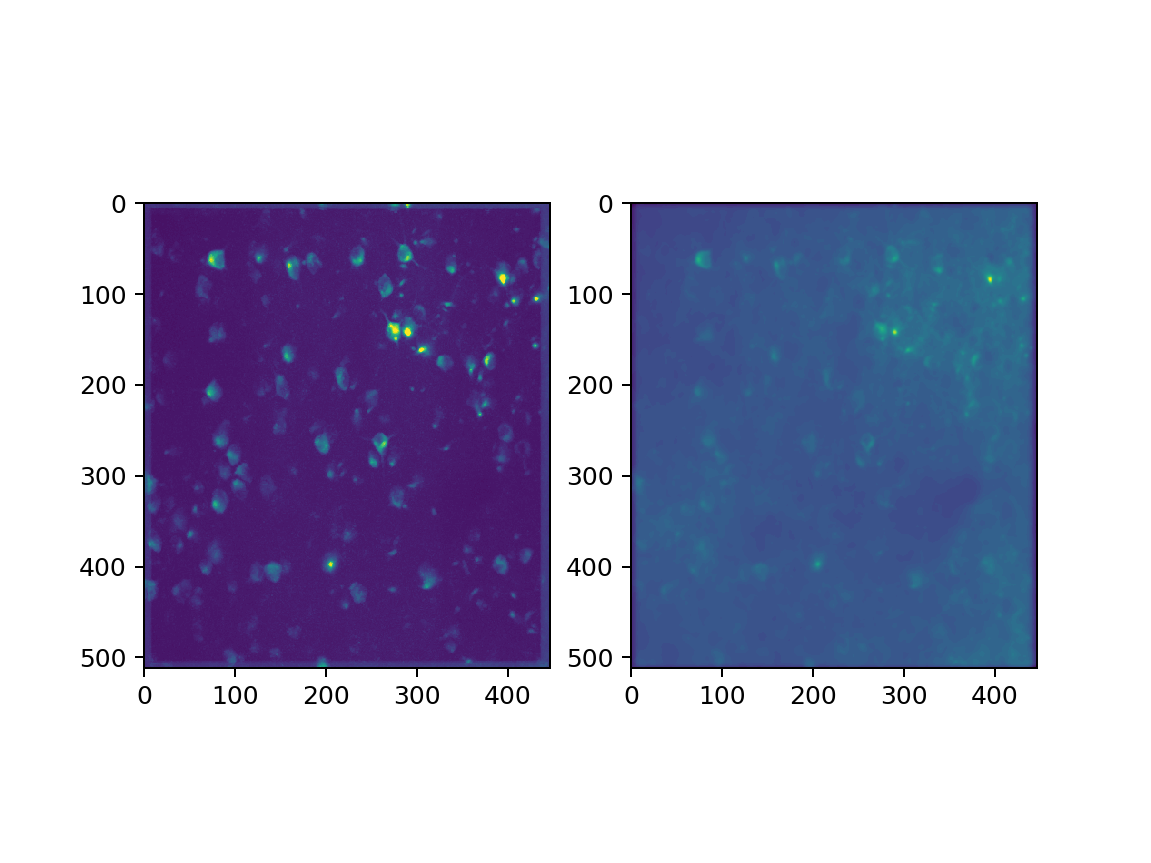

In [48]:
for key, val in session.stimulus_templates.items():
    print(key, val.shape)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(sitk.GetArrayFromImage(session.segmentation_mask_image))
ax[1].imshow(sitk.GetArrayFromImage(session.average_image))


### Running Speed:

<IPython.core.display.Javascript object>


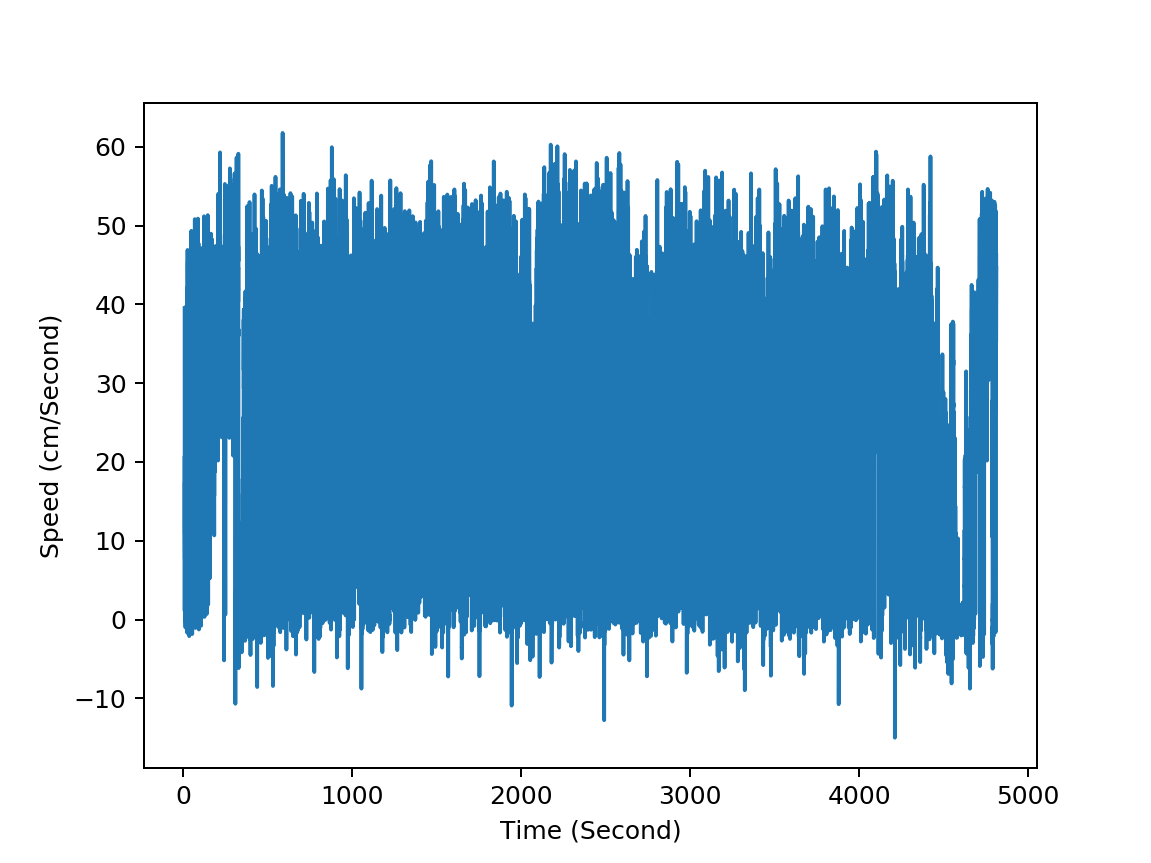

In [23]:
plt.plot(session.running_speed.timestamps, session.running_speed.values)
_ = plt.xlabel('Time (Second)')
_ = plt.ylabel('Speed (cm/Second)')

### Auxiliary DataFrames:

In [27]:
session.corrected_fluorescence_traces.head()

,corrected_fluorescence
cell_roi_id,
775897524,"[2548.568401684338, 2975.2969270660606, 2750.6..."
775897526,"[3665.1621923383914, 3806.8453879757503, 3556...."
775897529,"[2859.477876106194, 2589.227138643066, 2866.56..."
775897533,"[3587.504424778762, 3091.814159292033, 3171.74..."
775897539,"[2221.8879905388235, 2288.4365700265607, 2385...."


In [28]:
session.running_data_df.head()

,speed,dx,v_sig,v_in
timestamps,,,,
9.13635,39.540875,64.970497,4.171109,4.994278
9.14547,31.212194,2.476841,4.209816,4.999439
9.16250,23.403274,3.754377,4.257555,4.994278
9.17879,24.478065,5.406512,4.333678,4.995568
9.19513,24.881747,4.057272,4.386578,4.991698


In [29]:
session.motion_correction.head()

,x,y
0,8.50845,-0.912094
1,8.17096,-2.266330
2,7.52011,-0.814743
3,4.77211,-1.545810
4,7.18596,-0.318573


### Analysis Functions: Example

The goal of this section is to provide an example of how to define a set of function to achieve an analysis goal, that can easily be rolled into a package and made robust.

In [ ]:
def cut_trace(start_time, stop_time, timestamps, values):
    inds = np.nonzero(np.logical_and(timestamps>start_time, timestamps<stop_time))
    return values[inds]

The function `cut trace` exemplifies some of the desirable qualities of a reusable function: it does one thing, and does it well: 
- The name of the function describes its purpose
- The input arguments are relatively simple, making it easy to unit-test
- The function performs one (non-trivial) conceptual operation on its inputs, while not mutating them in the process (i.e. no side-effects)
- The function returns one output
- The implementation is relatively easy to understand by simply reading the code:

In [288]:
def cut_trace_by_epoch(epoch, timestamps, values):
    return cut_trace(epoch.start_time, epoch.stop_time, timestamps, values)

class Epoch:
    
    def __init__(self, start_time, stop_time):
        self.start_time = start_time
        self.stop_time = stop_time
        
e = Epoch(100, 100.25)
get_dff_by_epoch(e, session, cell_roi_id=775897524)

array([ 0.02424278,  0.22720633, -0.06981857, -0.00664797, -0.03977389,
        0.11364745,  0.05466523])

The `cut_trace_by_epoch` function acts as an *interface adapter*, allowing any object that implements the `start_time` and `stop_time` attributes to take advantage of `cut_traces` implementation.

Here we use `cut_trace_by_epoch` to compute mean running speed per-trial. This works because the `session.trials` table has two columns named `start_time` and `stop_time`, and the `iterrows` generator emits an object that has these attributes:

In [301]:
for trial_index, row in session.trials.head().iterrows():
    cut_running_speed = cut_trace_by_epoch(row, session.running_speed.timestamps, session.running_speed.values)
    print('trial {}: mean_speed = {:5.2f}'.format(trial_index, cut_running_speed.mean()))

trial 0: mean_speed =  9.99
trial 1: mean_speed = 35.11
trial 2: mean_speed = 36.25
trial 3: mean_speed = 23.33
trial 4: mean_speed =  0.10


In [303]:
def get_dff_by_epoch(epoch, session=None, cell_roi_id=None):
    timestamps = session.ophys_timestamps[:]
    values = session.dff_traces['dff'].loc[cell_roi_id]
    return cut_trace_by_epoch(epoch, timestamps, values)



The function `get_dff_by_epoch` uses assumptions about one of its arguments (session has property ophys_timestamps and dff_traces, for example) to reorganize the source data structure to for expected by `cut_trace_by_epoch`.  Next re apply this function across every row of a dataframe:

In [310]:
dff_series = session.trials.head().apply(get_dff_by_epoch, axis=1, session=session, cell_roi_id=775897524)

In [323]:
def ragged_average(series):
    
    nr = len(series)
    nc = max([len(arr) for arr in series.values])

    x = np.empty((nr, nc))
    x.fill(np.nan)
    for ri in range(nr):
        data = series.iloc[ri]
        x[ri,:len(data)] = data
            
    return np.nanmean(x, axis=0)

<IPython.core.display.Javascript object>


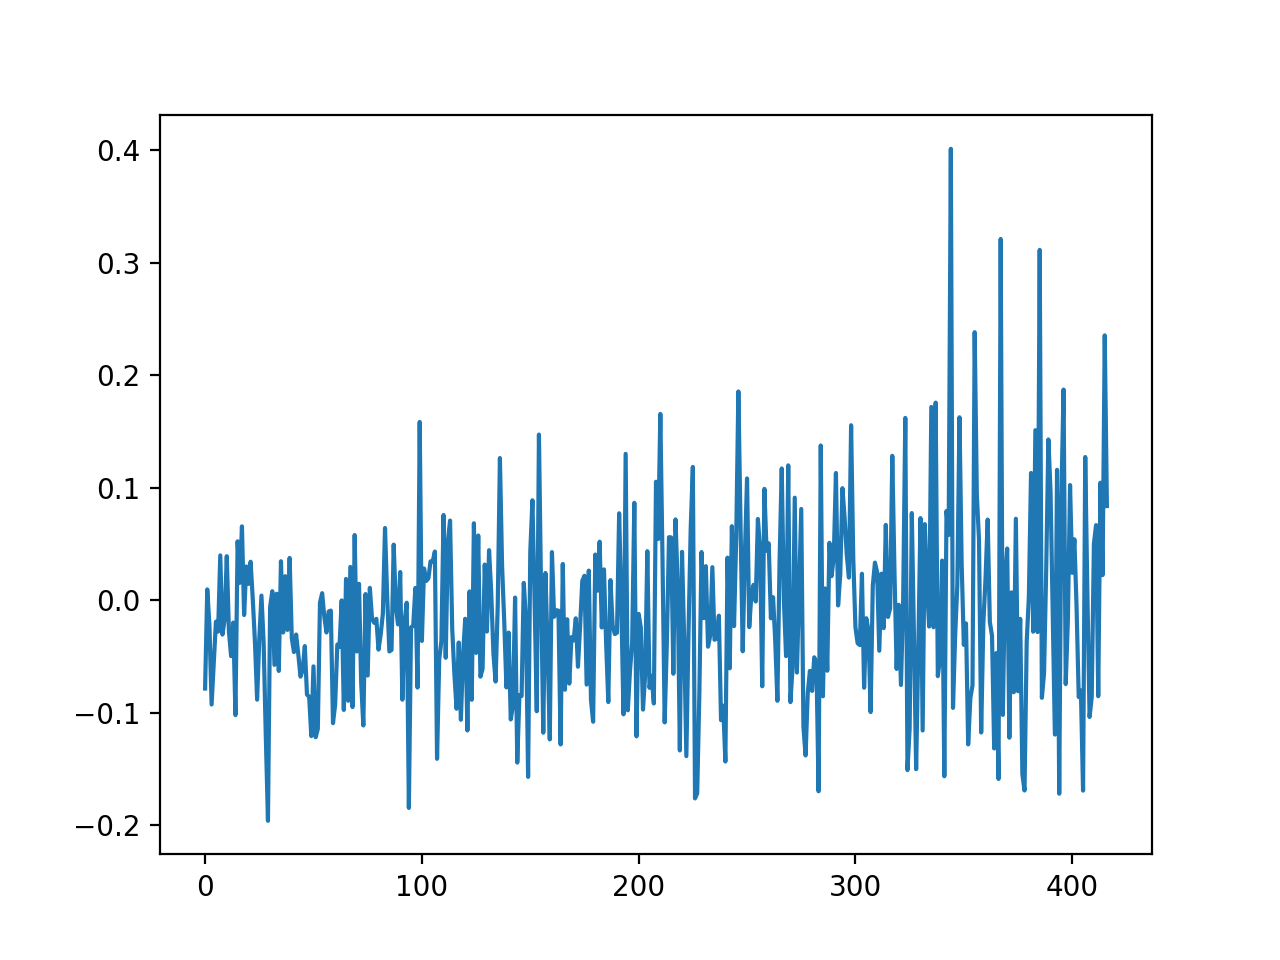

In [328]:
mean_dff = ragged_average(dff_series)
_ = plt.plot(mean_dff)

### Exercise:

1. **Work with a partner** (preferably someone you have never worked with before) to use:
```python
cut_trace
cut_trace_by_epoch
get_dff_by_epoch
ragged_average
```
to build a dataframe containing one feature column called mean_dff (each row is an array), and as many other feature columns as you need that encode various conditions of interest. For example:
  - `[mean_dff, hit]` where `hit` is a boolean encoding of trial
  - `[mean_dff, cell_specimen_id]`
  - `[mean_dff, stage]` where `stage` is pulled from session.task_parameters, across multiple session 
As you build this dataframe, think about the modularity of your code, and packaging subfunctions that might be reusable by others.
2. Do some analysis with this dataframe (time permitting)
3. Prepare a 30 second data blast about what features you worked to incorporate, and what analysis you started to tackle with this exercise, that you can present to the group.  No slide or figures necessary, just talking.